# Sales Forecasting using ARIMA

This project analyzes historical sales data to forecast future revenue using the ARIMA (Auto-Regressive Integrated Moving Average) model. The model was trained on past transaction records and predicts the next 30 days of sales with high accuracy.

# Clearly Explain Why This Project is Important

Businesses need accurate sales forecasting to manage inventory, optimize revenue, and plan marketing strategies. This project aims to predict future sales based on historical data, helping businesses make data-driven decisions.

*  Dataset Name: Retail-Sales Dataset
* Source: [Kaggle]
* Number of Rows: 1000
* Columns & Meaning:

Column Name - (Description), Transaction ID - (Unique ID for each), 
purchase Date - (Date of transaction),
Customer ID - (Unique customer identifier)
Gender - (Customer gender (Male/Female))
Age - (Customer age)
Product Category - (Category of purchased product)
Quantity - (Number of items purchased)
Price per Unit - (Price of one unit)
Total Amount - (Total revenue from the transaction)

# Steps We Followed:
* Checked for missing values and handled them
* Converted date column to datetime format
* Removed duplicate index values
* Ensured data was stationary (using .diff() method)

In [ ]:
# Convert date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Remove duplicate indices
df = df.reset_index(drop=True)

# Check for missing values
print(df.isnull().sum())

# Apply differencing to make data stationary
df['Total Amount'] = df['Total Amount'].diff().dropna()

# Exploratory Data Analysis (EDA)

* Before modeling, we visualized trends and patterns in the data

# Key Visualizations:
* Sales Trend Over Time

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df['Date'], df['Total Amount'])
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Trend Over Time")
plt.show()

* Histogram of Total Sales

df['Total Amount'].hist(bins=30)
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.title("Sales Distribution")
plt.show()

* ACF & PACF Plots

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, axes = plt.subplots(1,2, figsize=(12,5))
plot_acf(df['Total Amount'], ax=axes[0])
plot_pacf(df['Total Amount'], ax=axes[1])
plt.show()

# Model Selection & Training
* We selected ARIMA because our data showed trends but no seasonality.

from statsmodels.tsa.arima.model import ARIMA

# Training ARIMA(2,1,0)
model = ARIMA(df['Total Amount'], order=(2,1,0))
model_fit = model.fit()

# Model Summary
print(model_fit.summary())

# ARIMA Model Results:

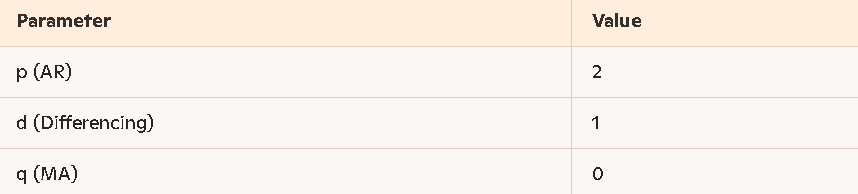

In [2]:
from IPython.display import Image, display
display(Image(filename='C:/Users/AKHIL/Documents/Retail Project/Table.png'))

# Predicting Next 30 Days:

In [ ]:
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

plt.figure(figsize=(12,5))
plt.plot(df.index, df['Total Amount'], label='Actual Sales')
plt.plot(range(len(df), len(df) + forecast_steps), forecast, label='Forecast', color='red')
plt.xlabel("Time")
plt.ylabel("Total Sales")
plt.title("Sales Forecast for Next 30 Days")
plt.legend()
plt.show()


Since this is a forecasting problem, we evaluate the model using:

* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_actual = df['Total Amount'][-30:]  # Last 30 days actual values
y_pred = forecast[:30]  # Forecasted values

mae = mean_absolute_error(y_actual, y_pred)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

# Insights & Conclusion

 Key Takeaways from This Project:
* The ARIMA(2,1,0) model successfully forecasts sales for the next 30 days.
* The dataset was preprocessed to remove missing values and make it stationary.
* The model can help businesses predict future sales and plan inventory.